In [1]:
import os
import torch 
import torchaudio
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from torch import nn

In [27]:
class Musical_Dataset(Dataset):
    
    def __init__(self, annotations_file, audio_dir, transform=None):
        self.annotations_file = annotations_file
        self.audio_dir = audio_dir
        self.transform  = transform
        
    def __len__(self):
        return len(self.annotations_file)

    def __getitem__(self, idx):
        
        label = self.annotations_file.iloc[idx, 1]
        
        audio_path = os.path.join(self.audio_dir, self.annotations_file.iloc[idx, 0])
        audio, sr = torchaudio.load(audio_path)
        
        
        
        return audio, label

In [28]:
AUDIO_PATH = "/Users/akhilsharma/Datasets/Musical_Instrument/New_Train/audio"
METADATA_PATH = "/Users/akhilsharma/Datasets/Musical_Instrument/New_Train/metadata.csv"
SAMPLE_OF_EACH_CLASS = 2500

labels_csv = pd.read_csv(METADATA_PATH, index_col=False)
labels_csv

Sound_Guitar_DF = labels_csv[labels_csv.Class == "Sound_Guitar"][:SAMPLE_OF_EACH_CLASS]
Sound_Drum_DF = labels_csv[labels_csv.Class == "Sound_Drum"][:SAMPLE_OF_EACH_CLASS]
Sound_Violin_DF = labels_csv[labels_csv.Class == "Sound_Violin"][:SAMPLE_OF_EACH_CLASS]
Sound_Piano_DF = labels_csv[labels_csv.Class == "Sound_Piano"][:SAMPLE_OF_EACH_CLASS]

train_df = pd.concat([Sound_Guitar_DF, Sound_Drum_DF, Sound_Violin_DF, Sound_Piano_DF], axis=0)
train_df = concatenated_df[["FileName", "Class"]]
train_df

,FileName,Class
0,0_1-E1-Major 00.wav,Sound_Guitar
1,1_1-E1-Major 00.wav,Sound_Guitar
2,0_1-E1-Major 01.wav,Sound_Guitar
3,1_1-E1-Major 01.wav,Sound_Guitar
4,0_1-E1-Major 02.wav,Sound_Guitar
...,...,...
31601,40_ROOM_room1_MUS_beethoven2_DEV_stereomic.wav,Sound_Piano
31602,41_ROOM_room1_MUS_beethoven2_DEV_stereomic.wav,Sound_Piano
31603,42_ROOM_room1_MUS_beethoven2_DEV_stereomic.wav,Sound_Piano
31604,43_ROOM_room1_MUS_beethoven2_DEV_stereomic.wav,Sound_Piano


In [29]:
#! create a object of Musical_Dataset 
musical_dataloader = Musical_Dataset(annotations_file=train_df, 
                      audio_dir=AUDIO_PATH)

In [38]:
musical_dataloader[0][0], musical_dataloader[0][1] 

(tensor([[-0.0001, -0.0003, -0.0004,  ..., -0.0298, -0.0098,  0.0026]]),
 'Sound_Guitar')

In [39]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(musical_dataloader, batch_size=128, shuffle=True)

In [68]:
import torchaudio.transforms as transforms
import matplotlib.pyplot as plt

def plot_mfcc(audio_signal):
        
    # Assuming you have an audio signal called audio_signal with length 8000 and sample rate 8000
    waveform = torch.Tensor(audio_signal)

    # Convert the audio waveform to MFCCs
    transform = transforms.MFCC(
        sample_rate=8000,
        n_mfcc=10
    )
    
    mfcc = transform(waveform)

    print(mfcc.shape)

    # Visualize the MFCCs
    plt.figure(figsize=(10, 4))
    plt.imshow(mfcc[0].detach().numpy(), cmap='hot', origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

torch.Size([1, 10, 41])


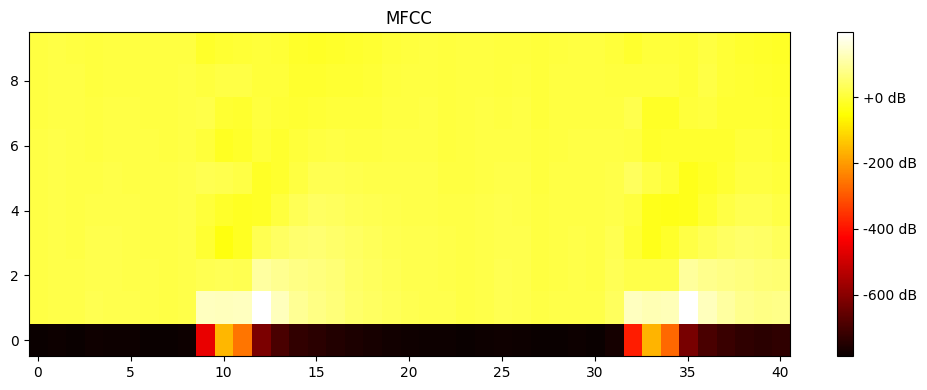

In [72]:
plot_mfcc(musical_dataloader[1970][0])